In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ss2012 = pd.read_csv('SunShine List/sunshine 2012.csv')
ss2013 = pd.read_csv('SunShine List/sunshine 2013.csv')
ss2014 = pd.read_csv('SunShine List/sunshine 2014.csv')
ss2015 = pd.read_csv('SunShine List/sunshine 2015.csv')

## Preview Data

In [3]:
ss2012.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012


In [4]:
ss2013.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,114.48,Algonquin College,Professor,2013
1,Colleges,AGATE,JEFFERY MICHAEL,108564.60,371.78,Algonquin College,"Manager, Counselling and Testing Services",2013


In [5]:
ss2014.head(2)

,Sector,Last name,First Name,Salary Paid,Taxable Benefits,Employer,Job title,Calendar year
0,Government of Ontario - Ministries,Almond,Margot,"$123,153.63",$204.96,Aboriginal Affairs,"Director, Corporate Management / Directrice, g...",2014
1,Government of Ontario - Ministries,Aniol,Richard,"$102,860.59",$173.98,Aboriginal Affairs,Senior Negotiator / Négociateur principal,2014


In [6]:
ss2015.head(2)
ss2015["Calendar Year"] = 2016 # Cleaning data as secondary information was placed in Calendar Year.
ss2015.head()
#2016 Data: Ontario Power to match previous years labels - Hydro One privatized.
ss2015["Sector"] = ss2015["Sector"].str.replace("Ontario Power Generation","HYDRO ONE AND ONTARIO POWER GENERATION")

In [7]:
ss2015['Sector'].value_counts()

Municipalities and Services                                 35684
School Boards                                               18417
Universities                                                17948
Government of Ontario - Ministries                          14096
Hospitals and Boards of Public Health                       13360
HYDRO ONE AND ONTARIO POWER GENERATION                       7730
Other Public Sector Employers                                6042
Colleges                                                     5375
Crown Agencies                                               4742
Government of Ontario - Judiciary                             613
Government of Ontario - Legislative Assembly and Offices      267
Seconded (Education)*                                         112
Seconded (Community Safety and Correctional Services)*         40
Seconded (Advanced Education and Skills Development)*           4
Seconded (Children and Youth Services)*                         3
Seconded (

## Edit ss2014 to match column names

In [8]:
ss2014.rename(columns = {"Job title":"Job Title", "Calendar year":"Calendar Year", "Last name":"Last Name"}, inplace=True)
ss2014.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Government of Ontario - Ministries,Almond,Margot,"$123,153.63",$204.96,Aboriginal Affairs,"Director, Corporate Management / Directrice, g...",2014
1,Government of Ontario - Ministries,Aniol,Richard,"$102,860.59",$173.98,Aboriginal Affairs,Senior Negotiator / Négociateur principal,2014


## Join dataframes together

In [9]:
sunshine = pd.concat([ss2012,ss2013,ss2014,ss2015], ignore_index=True)
sunshine.head(3)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102186,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104657,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133,185.88,Algonquin College,Professor,2012


## Clean Data

In [10]:
# Remove the '$' from salaries
sunshine["Salary Paid"] = sunshine["Salary Paid"].astype(str).str.replace("$","") 
#Not all salaries are type float - therefore convert all to str to manipulate
# Remove ','
sunshine["Salary Paid"] = sunshine["Salary Paid"].str.replace(",","")
sunshine["Salary Paid"] = sunshine["Salary Paid"].astype(float)
sunshine.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133.47,185.88,Algonquin College,Professor,2012
3,Colleges,ALLAN,GAIL,104893.10,185.88,Algonquin College,Professor,2012
4,Colleges,ALLEN,IAN D.,104140.79,119.88,Algonquin College,Professor,2012


In [11]:
# Remove "$" and "," from benefits
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].astype(str).str.replace("$","")
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].str.replace(",","")
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].astype(float)
sunshine.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133.47,185.88,Algonquin College,Professor,2012
3,Colleges,ALLAN,GAIL,104893.10,185.88,Algonquin College,Professor,2012
4,Colleges,ALLEN,IAN D.,104140.79,119.88,Algonquin College,Professor,2012


In [12]:
# Check Null values and remove

In [13]:
sunshine.isnull().sum()

Sector              0
Last Name           0
First Name          1
Salary Paid         0
Taxable Benefits    1
Employer            0
Job Title           0
Calendar Year       0
dtype: int64

In [14]:
sunshine[sunshine['First Name'].isnull()] 

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
93157,Crown Agencies,LI,NaN,108421.82,47.18,eHealth Ontario,Privacy and Security Architect,2013


In [15]:
sunshine.iloc[93157,2] = "BLANK"

In [16]:
sunshine[sunshine['Taxable Benefits'].isnull()]

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
382383,Other Public Sector Employers,Malenfant,James,152545.47,NaN,Independent Electricity System Operator,Senior Analyst - Compliance and Dispute Resolu...,2016


In [17]:
sunshine.iloc[382383,4]=0

In [18]:
sunshine['Sector'] = sunshine['Sector'].str.strip().str.upper()

In [19]:
sunshine['Last Name'] = sunshine['Last Name'].str.strip().str.upper()
sunshine['First Name'] = sunshine['First Name'].str.strip().str.upper()

In [20]:
sunshine['Employer'].nunique()

3048

In [21]:
sunshine['Employer'].str.strip().str.upper().nunique()

2799

In [22]:
sunshine['Employer'] = sunshine['Employer'].str.strip().str.upper()

In [23]:
#2016 Data: SECONDED (COMMUNITY SAFETY AND CORRECTIONAL SERVICES) change to match others
#SECONDED (COMM. SAFETY AND CORR. SERVICES)
sunshine["Sector"] = sunshine["Sector"].str.replace("*","")
sunshine["Sector"] = sunshine["Sector"].str.replace("SECONDED \(COMMUNITY SAFETY AND CORRECTIONAL SERVICES\)","SECONDED (COMM. SAFETY AND CORR. SERVICES)")

In [24]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null object
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null object
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


## Optimize the sunshine DF

In [25]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null object
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null object
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [26]:
sunshine.nunique()

Sector                  25
Last Name            59356
First Name           29812
Salary Paid         346146
Taxable Benefits     95113
Employer              2799
Job Title            66466
Calendar Year            4
dtype: int64

In [27]:
sunshine["Sector"] = sunshine["Sector"].astype("category")
sunshine["Employer"] = sunshine["Employer"].astype("category")

In [28]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null category
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null category
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: category(2), float64(2), int64(1), object(3)
memory usage: 20.7+ MB


## Graph Data

In [29]:
year_groups = sunshine.groupby("Calendar Year")

In [30]:
year_groups.get_group(2012)["Sector"].value_counts()

MUNICIPALITIES AND SERVICES                                 19914
UNIVERSITIES                                                14706
SCHOOL BOARDS                                               12037
HYDRO ONE AND ONTARIO POWER GENERATION                      11357
GOVERNMENT OF ONTARIO - MINISTRIES                          10349
HOSPITALS AND BOARDS OF PUBLIC HEALTH                        8449
COLLEGES                                                     4016
OTHER PUBLIC SECTOR EMPLOYERS                                3522
CROWN AGENCIES                                               3185
GOVERNMENT OF ONTARIO - JUDICIARY                             628
GOVERNMENT OF ONTARIO - LEGISLATIVE ASSEMBLY AND OFFICES      246
SECONDED (EDUCATION)                                           94
SECONDED (COMM. SAFETY AND CORR. SERVICES)                     29
SECONDED (CHILDREN & YOUTH SERVICES)                            5
SECONDED (TRAINING, COLLEGES & UNIVERSITIES)                    2
SECONDED (

In [31]:
sector_count_2012 = sunshine[sunshine['Calendar Year']==2012]['Sector'].value_counts()
sector_count_2013 = sunshine[sunshine['Calendar Year']==2013]['Sector'].value_counts()
sector_count_2014 = sunshine[sunshine['Calendar Year']==2014]['Sector'].value_counts()
sector_count_2016 = sunshine[sunshine['Calendar Year']==2016]['Sector'].value_counts()

In [32]:
sector_count_2012[sector_count_2012 > 0] #get values of sectors for each year and create a new dataframe. Y=year, X=Sectors

MUNICIPALITIES AND SERVICES                                 19914
UNIVERSITIES                                                14706
SCHOOL BOARDS                                               12037
HYDRO ONE AND ONTARIO POWER GENERATION                      11357
GOVERNMENT OF ONTARIO - MINISTRIES                          10349
HOSPITALS AND BOARDS OF PUBLIC HEALTH                        8449
COLLEGES                                                     4016
OTHER PUBLIC SECTOR EMPLOYERS                                3522
CROWN AGENCIES                                               3185
GOVERNMENT OF ONTARIO - JUDICIARY                             628
GOVERNMENT OF ONTARIO - LEGISLATIVE ASSEMBLY AND OFFICES      246
SECONDED (EDUCATION)                                           94
SECONDED (COMM. SAFETY AND CORR. SERVICES)                     29
SECONDED (CHILDREN & YOUTH SERVICES)                            5
SECONDED (TRAINING, COLLEGES & UNIVERSITIES)                    2
SECONDED (

In [33]:
a = sector_count_2012.to_frame()
b = sector_count_2013.to_frame()
c = sector_count_2014.to_frame()
d = sector_count_2016.to_frame()

In [34]:
sectors_in_years = a.merge(b, left_index=True, right_index=True, suffixes=('_2012', '_2013')).merge(c, left_index=True, right_index=True).merge(d, left_index=True, right_index=True, suffixes=('_2014', '_2016'))

In [35]:
sectors_in_years

,Sector_2012,Sector_2013,Sector_2014,Sector_2016
MUNICIPALITIES AND SERVICES,19914,25675,30800,35684
UNIVERSITIES,14706,15581,16375,17948
SCHOOL BOARDS,12037,12294,12731,18417
HYDRO ONE AND ONTARIO POWER GENERATION,11357,11777,12026,7730
GOVERNMENT OF ONTARIO - MINISTRIES,10349,10483,13536,14096
HOSPITALS AND BOARDS OF PUBLIC HEALTH,8449,9301,11628,13360
COLLEGES,4016,4196,4631,5375
OTHER PUBLIC SECTOR EMPLOYERS,3522,4190,4994,6042
CROWN AGENCIES,3185,3414,3909,4742
GOVERNMENT OF ONTARIO - JUDICIARY,628,633,628,613


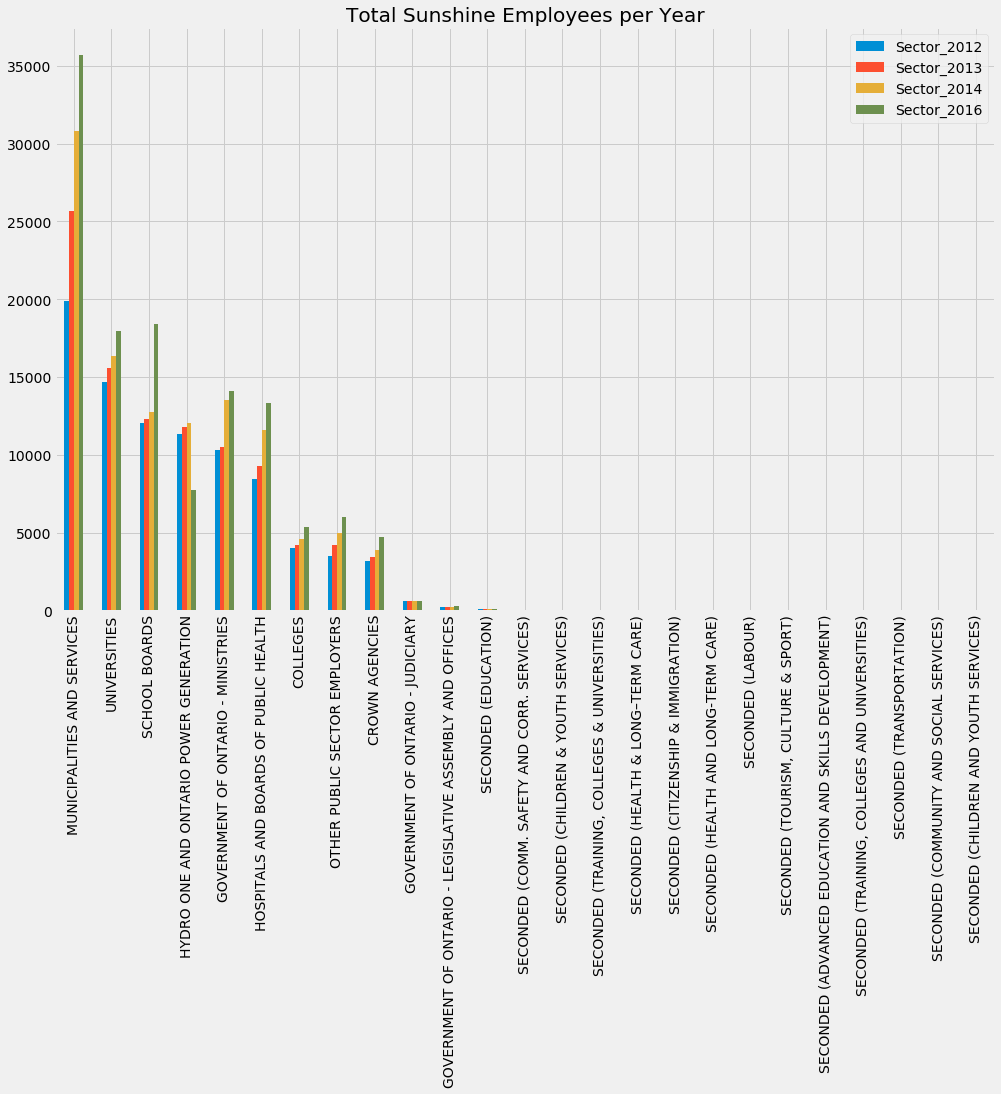

In [36]:
sectors_in_years.plot(title='Total Sunshine Employees per Year', kind='bar',figsize=(15,10))

In [37]:
def over_1000(row):
    return (row[0]>1000) | (row[1]>1000) | (row[2]>1000) | (row[3]>1000)

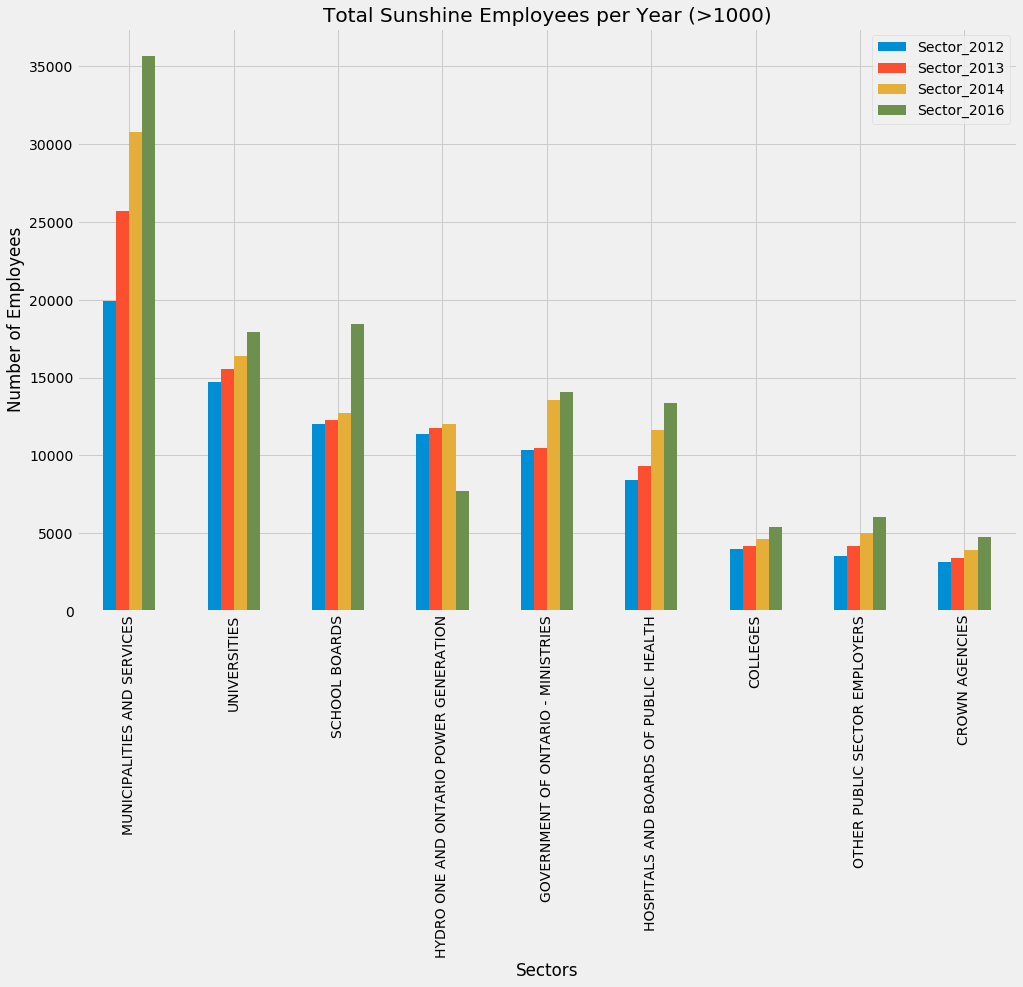

In [38]:
#Taking a look at the sectors with more than 1000 employees (in any year) in the sunshine list
sect_over1000 = sectors_in_years.apply(over_1000, axis=1)    
g2 = sectors_in_years[sect_over1000].plot(title='Total Sunshine Employees per Year (>1000)',kind='bar',figsize=(15,10))
g2.set(xlabel="Sectors", ylabel="Number of Employees")

In [39]:
aa = sectors_in_years[sect_over1000]
aa

,Sector_2012,Sector_2013,Sector_2014,Sector_2016
MUNICIPALITIES AND SERVICES,19914,25675,30800,35684
UNIVERSITIES,14706,15581,16375,17948
SCHOOL BOARDS,12037,12294,12731,18417
HYDRO ONE AND ONTARIO POWER GENERATION,11357,11777,12026,7730
GOVERNMENT OF ONTARIO - MINISTRIES,10349,10483,13536,14096
HOSPITALS AND BOARDS OF PUBLIC HEALTH,8449,9301,11628,13360
COLLEGES,4016,4196,4631,5375
OTHER PUBLIC SECTOR EMPLOYERS,3522,4190,4994,6042
CROWN AGENCIES,3185,3414,3909,4742


In [40]:
aa.iloc[0]
    

Sector_2012    19914
Sector_2013    25675
Sector_2014    30800
Sector_2016    35684
Name: MUNICIPALITIES AND SERVICES, dtype: int64

In [41]:
aa.iloc[0].pct_change()

Sector_2012         NaN
Sector_2013    0.289294
Sector_2014    0.199611
Sector_2016    0.158571
Name: MUNICIPALITIES AND SERVICES, dtype: float64

In [42]:
percent_changes = aa.pct_change(axis=1)

In [43]:
percent_changes = percent_changes.multiply(100)
percent_changes = percent_changes.T.dropna()

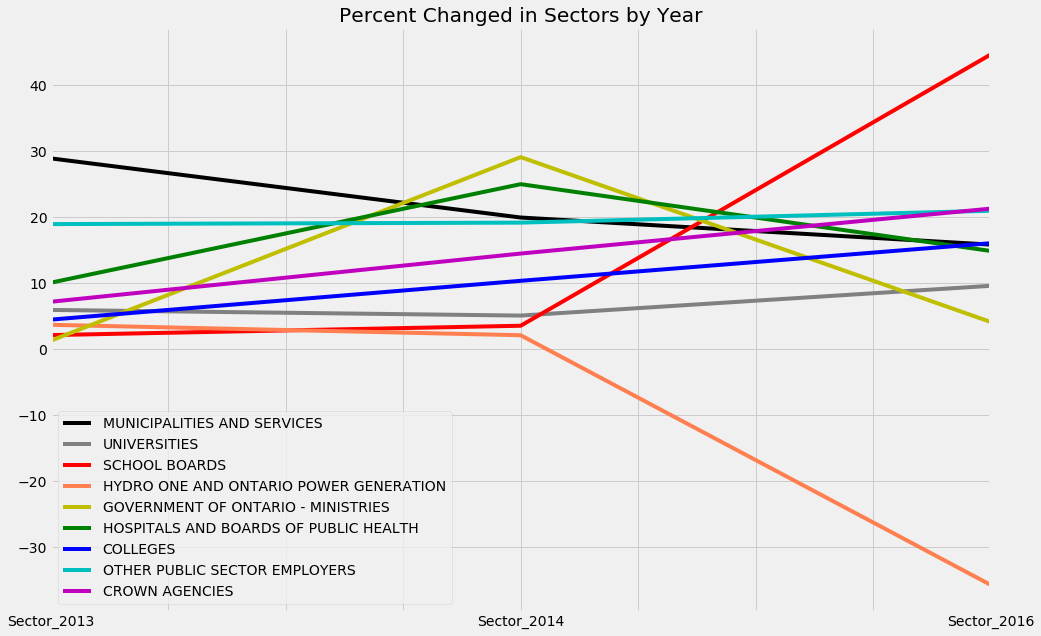

In [51]:
g3 = percent_changes.plot(figsize=(15,10),lw=4, title="Percent Changed in Sectors by Year", color=['k','grey','r','coral','y','g','b','c','m'])